**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

# Initialize Jupyter Notebook. Scroll down for report!

In [169]:
# Import libraries
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier # ovr
from sklearn.metrics import log_loss
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import itertools
from sklearn import svm, datasets
import matplotlib

#...

In [114]:
#Variables
output_file = "./output/normal_accuracy.csv"
output_file_logloss = "./output/normal_logloss.csv"
np.set_printoptions(precision=4)
labels = {1: 'Pop_Rock',
2: 'Electronic',
3: 'Rap',
4: 'Jazz',
5: 'Latin',
6: 'RnB',
7: 'International',
8: 'Country',
9: 'Reggae',
10: 'Blues'}


# Read in data
train_data_df = pd.read_csv("train_data.csv", header=None, names=generate_train_labels())
train_data_labels_df = pd.read_csv("train_labels.csv", header = None, names = ["Sample_label"])
test_data_df = pd.read_csv("test_data.csv", header = None)
all_labels = train_data_labels_df.as_matrix()
all_labels_text = [labels[int(x)] for x in all_labels]
all_train_features = train_data_df.as_matrix()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [172]:
def generate_train_labels():
    rhythm = ["rhythm%d" % i for i in range(0, 168)]
    chroma = ["chroma%d" % i for i in range(168, 216)]
    mfcc = ["mfcc%d" % i for i in range(216,264)]
    return rhythm + chroma + mfcc

def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'
    
# Writing logloss format
def write_output_logloss(model_prediction, output_file):
    with open(output_file, "w") as output:
        output.write("Sample_id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9,Class_10\n")
        for idx, pred in enumerate(model_prediction):
            s= ""
            for val in pred:
                s += ", " + str(val)
            output.write(str(idx + 1) + s + "\n")
            

# Writing accuracy format
def write_output(model_prediction, output_file):
    with open(output_file, "w") as output:
        output.write("Sample_id,Sample_label\n")
        for idx, pred in enumerate(model_prediction):
            output.write(str(idx + 1) + "," + str(int(pred)) + "\n")

def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    



# ##### REPORT STARTS ##### #

# *Song Genre Classification Using Logistic Regression and Random Forest Classifier*

## Abstract

*Precise summary of the whole report, previews the contents and results. Must be a single paragraph between 100 and 200 words.*



## 1. Introduction

In this project our goal is to classify songs by their genre. The classification is implemented by methods we have learned in the Machine Learning Basic Principle (MLBP) course so far. Classification of songs is a good real-life case where Machine Learning (ML) methods can be utilized while the topic is still easily understandable. For instance, song classification algorithm can be used by Spotify for song recommendations based on some user's most listened songs. 

Although the project is well defined and easily understood by human, it is however not a easy task for machines. Some of the genres are very distinct from each other, such as heavy metal and jazz. On the other hand, many features of pop and blues are very close to each other which makes the distinction between these genres a lot harder.

In a nutshell, the goal was to construct a predictor h(x) for each genre and analyse how well this predictor is.
The goal of this project is to apply the machine learning concepts we have learned so far in the class in a real life case which is determine genre of a song by over 200 features of the song. 

Our report consist of following chapters 2) Data analysis, 3) Methods and Experiments, 4) Results and finally 5) Discussion and Conclusion. In chapter 2 we have familiarized ourselves with the given training data and its multiple different features. The insights from data analysis stand a crucial part in choosing of method. The implementation and experiments of ML methods have been documented in chapter 3 following chapter 4 where results of experiments are presented. In the last chapter 5 we have discussed our learnings from the project.


What do you hope to learn? Machine Learning.



## 2. Data analysis

*Briefly describe data (class distribution, dimensionality) and how will it affect
classification. Visualize the data. Don’t focus too much on the meaning of the features,
unless you want to.*

*- Include histograms showing class distribution.*

For the project we have been provided feature data and label data for training of the model, and also test data without labels for validating of the accuracy and logloss on Kaggle. The label data includes label for each sample in feature dataset. There are in total 10 different labels (class) varying from electronic to jazz. A sample of the data is shown below.

The class distribution is rather skewed towards the Genre 1 which is Pop & Rock. Almost 60% of the songs are classified as 1 (Pop & Rock). The domination of one class can affect the classification which has to be taken into account when testing models. In the next chapter we have discussed a method where we tried to balance the data before training for better results.

Furthermore, the data is ordered in such a way that first 3000 of the samples are 80% class 1, see second histogram. This needs to be taken into account when splitting the data.

,Sample_label
3456,2
3457,10
3458,2
3459,7
3460,4


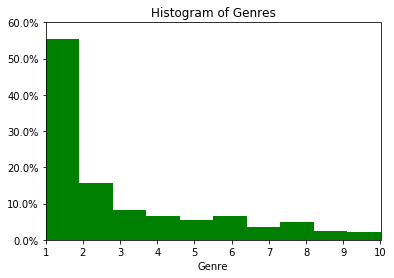

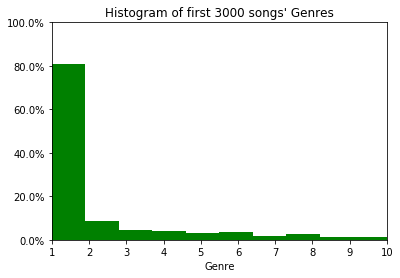

In [107]:
display(HTML(train_data_labels_df[3456:3461].to_html(max_rows=5)))

n, bins, patches = plt.hist(all_labels, 10, density=1, facecolor='g')
plt.title('Histogram of Genres')
plt.axis([1, 10, 0, 0.6])
plt.xlabel("Genre")
vals = plt.yticks()
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

n, bins, patches = plt.hist(all_labels[0:3000], 10, density=1, facecolor='g')
plt.title("Histogram of first 3000 songs' Genres")
plt.axis([1, 10, 0, 1])
plt.xlabel("Genre")
vals = plt.yticks()
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()




The feature data provided to us consists of 4364 samples of which each has 264 features. The features are divided in three categories: 1) Rhytm (168 features) 2) Pitch (48 features) and 3) Timbre (48 features). The dimensionality of the data is hence rather high. A sample of the data is shown below




In [71]:
display(HTML(train_data_df.to_html(max_rows=5)))

,rhythm0,rhythm1,rhythm2,rhythm3,rhythm4,rhythm5,rhythm6,rhythm7,rhythm8,rhythm9,rhythm10,rhythm11,rhythm12,rhythm13,rhythm14,rhythm15,rhythm16,rhythm17,rhythm18,rhythm19,rhythm20,rhythm21,rhythm22,rhythm23,rhythm24,rhythm25,rhythm26,rhythm27,rhythm28,rhythm29,rhythm30,rhythm31,rhythm32,rhythm33,rhythm34,rhythm35,rhythm36,rhythm37,rhythm38,rhythm39,rhythm40,rhythm41,rhythm42,rhythm43,rhythm44,rhythm45,rhythm46,rhythm47,rhythm48,rhythm49,rhythm50,rhythm51,rhythm52,rhythm53,rhythm54,rhythm55,rhythm56,rhythm57,rhythm58,rhythm59,rhythm60,rhythm61,rhythm62,rhythm63,rhythm64,rhythm65,rhythm66,rhythm67,rhythm68,rhythm69,rhythm70,rhythm71,rhythm72,rhythm73,rhythm74,rhythm75,rhythm76,rhythm77,rhythm78,rhythm79,rhythm80,rhythm81,rhythm82,rhythm83,rhythm84,rhythm85,rhythm86,rhythm87,rhythm88,rhythm89,rhythm90,rhythm91,rhythm92,rhythm93,rhythm94,rhythm95,rhythm96,rhythm97,rhythm98,rhythm99,rhythm100,rhythm101,rhythm102,rhythm103,rhythm104,rhythm105,rhythm106,rhythm107,rhythm108,rhythm109,rhythm110,rhythm111,rhythm112,rhythm113,rhythm114,rhythm115,rhythm116,rhythm117,rhythm118,rhythm119,rhythm120,rhythm121,rhythm122,rhythm123,rhythm124,rhythm125,rhythm126,rhythm127,rhythm128,rhythm129,rhythm130,rhythm131,rhythm132,rhythm133,rhythm134,rhythm135,rhythm136,rhythm137,rhythm138,rhythm139,rhythm140,rhythm141,rhythm142,rhythm143,rhythm144,rhythm145,rhythm146,rhythm147,rhythm148,rhythm149,rhythm150,rhythm151,rhythm152,rhythm153,rhythm154,rhythm155,rhythm156,rhythm157,rhythm158,rhythm159,rhythm160,rhythm161,rhythm162,rhythm163,rhythm164,rhythm165,rhythm166,rhythm167,chroma168,chroma169,chroma170,chroma171,chroma172,chroma173,chroma174,chroma175,chroma176,chroma177,chroma178,chroma179,chroma180,chroma181,chroma182,chroma183,chroma184,chroma185,chroma186,chroma187,chroma188,chroma189,chroma190,chroma191,chroma192,chroma193,chroma194,chroma195,chroma196,chroma197,chroma198,chroma199,chroma200,chroma201,chroma202,chroma203,chroma204,chroma205,chroma206,chroma207,chroma208,chroma209,chroma210,chroma211,chroma212,chroma213,chroma214,chroma215,mfcc216,mfcc217,mfcc218,mfcc219,mfcc220,mfcc221,mfcc222,mfcc223,mfcc224,mfcc225,mfcc226,mfcc227,mfcc228,mfcc229,mfcc230,mfcc231,mfcc232,mfcc233,mfcc234,mfcc235,mfcc236,mfcc237,mfcc238,mfcc239,mfcc240,mfcc241,mfcc242,mfcc243,mfcc244,mfcc245,mfcc246,mfcc247,mfcc248,mfcc249,mfcc250,mfcc251,mfcc252,mfcc253,mfcc254,mfcc255,mfcc256,mfcc257,mfcc258,mfcc259,mfcc260,mfcc261,mfcc262,mfcc263
0,1040.7,2315.6,2839.1,2552.2,2290.4,1913.8,2152.6,1930.3,2079.30,1706.70,1953.4,1513.5,1882.6,1802.7,2050.5,1891.1,1614.4,950.52,787.93,697.59,477.02,301.42,122.39,1.499,580.9,2149.8,1543.6,1046.4,1588.9,1388.50,1527.4,1135.00,1244.20,1088.60,1636.4,1044.8,1763.0,1476.8,1979.7,1503.20,1168.30,286.36,203.43,192.00,106.19,76.905,26.470,0.016,989.47,1484.40,744.62,367.04,961.96,1378.60,963.90,1206.20,926.070,1363.7,1262.30,1185.70,1566.60,1073.40,1383.60,1270.50,1197.40,857.27,1121.20,1373.70,1359.90,2052.600,2598.00,11504.0,3987.6,5632.8,3509.8,2556.8,4313.3,5500.1,3890.4,5192.5,3813.0,5921.8,4324.7,4601.6,7033.8,3856.0,5336.3,4940.8,4560.1,4190.1,5504.3,6080.7,5272.6,9246.9,12185.0,150390.0,831.58,1914.5,2639.0,2439.4,2064.3,1673.40,1931.50,1748.0,1846.50,1492.10,1566.50,1291.50,1552.60,1464.30,1697.6,1575.8,1344.2,863.88,726.28,590.76,393.19,217.53,66.00,1.066,6.04,203.38,430.020,500.560,217.930,303.610,209.620,214.750,291.370,198.770,202.13,169.680,210.850,165.780,231.080,258.480,176.540,21.119,73.797,80.082,37.997,24.555,1.593,1.066,4097.7,8669.9,7205.8,5314.4,7448.6,6748.8,6298.5,6559.9,6393.4,6705.8,6701.1,5542.9,8142.4,6256.2,7571.7,6894.4,5794.4,3102.8,2811.0,2781.5,1743.1,1705.5,1037.80,49.366,0.53113,0.27914,0.29100,0.18867,0.27142,0.43106,0.23045,0.30437,0.19682,0.36930,0.35071,0.22654,0.131870,0.054957,0.084974,0.037669,0.066023,0.125500,0.047220,0.094917,0.040921,0.110060,0.099065,0.045715,0.010,0.009,0.007,0.003,0.002,0.007,0.006,0.006,0.003,0.004,0.003,0.003,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000,1.0,1.0,1.0,1000000.0,1000000.

Analysing the data visually is very hard when the dimensionality increases over 3. There are multiple ways for reducing the dimensions of dataset, so it can be further analyzed. We have used PCA to reduce the number of features.
The features are divided in three categories: 1) Timbre; 2) Rhytm and 3) Pitch. In theory the data could be reduced to these three components, but if the features are reduced under, see below.

We noticed by trial and error that with six Principle Components it is possible to maintain accuracy of the data and 99% of the variance of the data.

Scatter plot of reduced data set (6 features)

In [96]:
all_train_features = train_data_df.as_matrix()
cov_mat = np.cov(all_train_features)
u,s,v = np.linalg.svd(cov_mat)
s_sum = np.sum(s)
var = 1
n_components = 100
while n_components>0 and var>=0.9999:
    n_components -= 1
    var = float(np.sum(s[:n_components]))/s_sum
n_components += 1
print(n_components, " PC components give the optimal result")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


6  PC components give the optimal result


Below we have reduced the number of features from 264 down to 6, and plotted features in pairwise plot. From the plot it is obvious that there is correlation between some features. There are also quite a few features which create a T shaped plot in different directions which means that the correlation is not linear.

There are only two cases where points where points where no correlation can be seen between features, such as 2 vs 5. All points have also been colored by the label, and from the plots it can be seen that the colors are highly mixed and no distinct clusters can be seen. This may indicate that good results cannot be obtained from this dataset as it is not easy to distinct different labels by their features. 

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


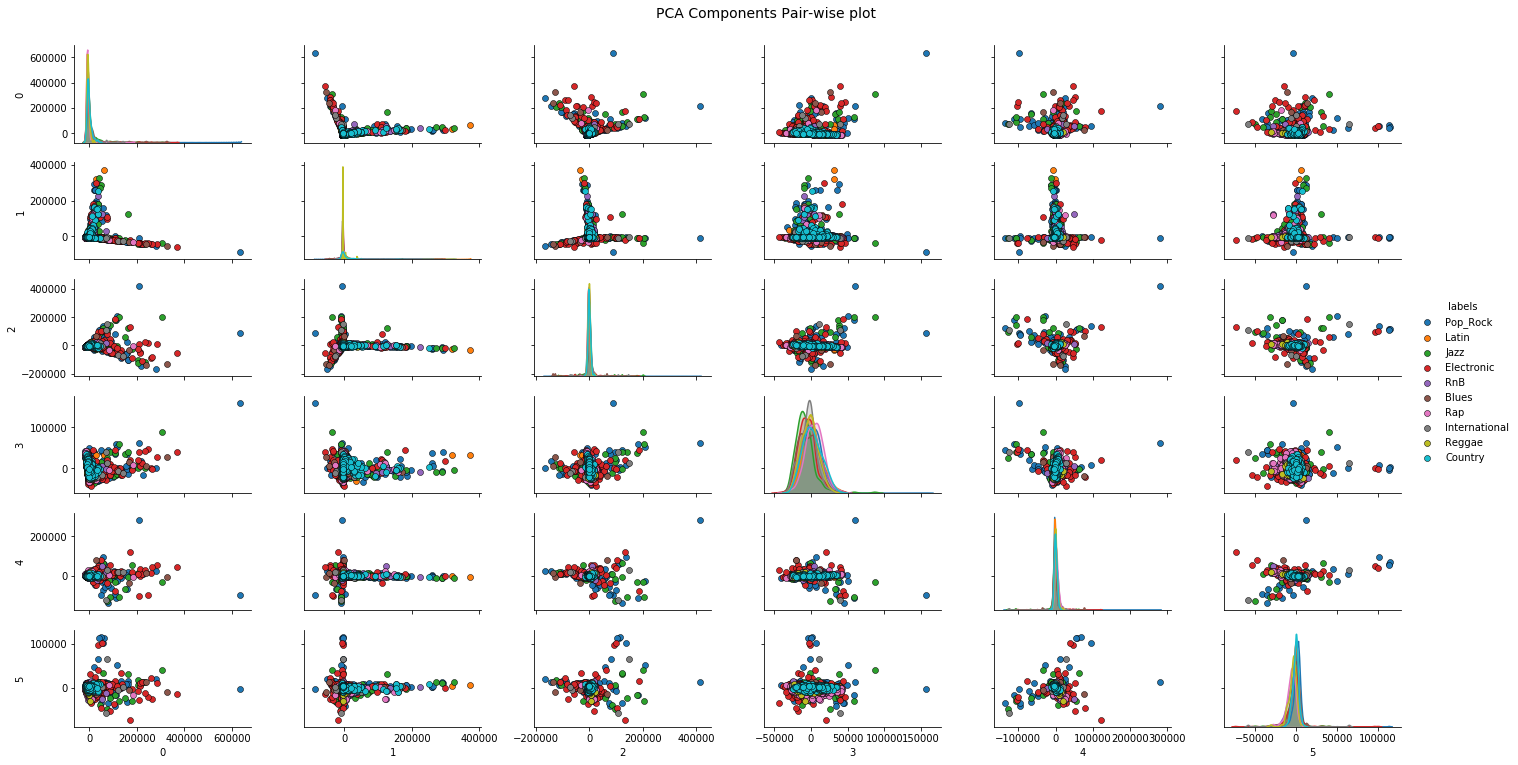

In [99]:
pca = PCA(n_components = 6, svd_solver = "full")
features_for_scatter = pca.fit_transform(train_data_df)
#features_for_scatter = preprocessing.normalize(features_for_scatter, 'l2')
features_for_scatter = pd.DataFrame(features_for_scatter)
features_for_scatter['labels'] = all_labels_text

#Pair-wise Scatter Plots
pp = sns.pairplot(features_for_scatter, size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True), hue= 'labels')

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('PCA Components Pair-wise plot', fontsize=14)

We divided the training set two distinct sets, one for training and second for validation of the model. We started with the rule of thumb 70/30 ratio which proved to give the best results. The other ratios we tried were 50/50, 60/40 and 80/20. 

As mentioned before, 80% of the first 3000 samples are class 1. For this reason we have also shuffled the data when splitting it, so both sets would have same distribution.

In [142]:
x_train, x_test, y_train, y_test = train_test_split(
    train_data_df, train_data_labels_df, test_size = 0.3, shuffle=True)



# Changing csv format to numpy array format
labels_train = y_train.as_matrix()
features_train = x_train.as_matrix()
labels_test = y_test.as_matrix()
features_test = x_test.as_matrix()

print(labels_train.size)
print(features_train.shape[0])
print(labels_test.size)
print(features_test.shape[0])

3054
3054
1309
1309


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


## 3. Methods and experiments

*- Explain your whole approach (you can include a block diagram showing the steps in your process).* 

*- What methods/algorithms, why were the methods chosen. *

*- What evaluation methodology (cross CV, etc.).*
Our implementation includes methods such as Logistic Regression and Random Forest Classifier. In this real-life case, it is also important to analyse the data before implementing any of the aforementioned methods. 

### Approach

Our initial approach for modeling the problem was to minimize the dimensionality of the data with PCA as we have discussed before. Then using Logistic regression and One Versus Rest (OvR) multiclassification. We have chosen Logistic regression as it is good for classification problem, that is the result is binary. 

# SAULI KIRJOTA LR JA OvR BECAUSE YOU CHOSE THEM :)


OvR 


###  PCA and Logistic Regression

As our first try we decided to use the PCA for reducing the high number offeatures before running Logistic regression, as we have already have analysed the data after PCA with 6 principal components. Below you can find the code for using PCA and LogisticRegression for learning a model.



Accuracy from the given method for training data was 0.52 and for validation data 0.48. These figures are rather low for Logistic regression analysis model which motivated us to research other methods.


In [138]:
# Trials with ML algorithms
pca = PCA(n_components = 6, svd_solver = "full")
features_train_pca = pca.fit_transform(features_train)
features_test_pca = pca.fit_transform(features_test)

clf = LogisticRegression(random_state=23, solver='lbfgs', multi_class="ovr", max_iter = 1000)
ovr = OneVsRestClassifier(clf)
ovr.fit(features_train_pca,labels_train)


score_train = ovr.score(features_train_pca, labels_train)
score_test = ovr.score(features_test_pca, labels_test)
print("Accuracy from training data is {:.4f} and from test data {:.4f}. The difference is {:.4f}".format(float(score_train), float(score_test), float(score_train-score_test)))

test_data_df_pca = pca.fit_transform(test_data_df)
predictData = ovr.predict(test_data_df_pca)
predictProbData = ovr.predict_proba(test_data_df_pca)

#y_pred = clf.predict(X_test)
#accuracy = np.sum(y_pred == y_test) / y_test.shape[0]

Accuracy from training data is 0.5167 and from test data 0.4767. The difference is 0.0400



### Random Forest Classifier

We tried classifier called RandomForestClassifier as it is "The state-of-art" classifier at time being. With RF we acquired better results compared to the PCA and LR. Accuracy was 0.63 for training data and 0.55 for validation data. The difference between the accuracies was 0.07 which implies that overfitting might be present. Overall, the 0.55-0.63 accuracy is still rather low.



In [149]:

clf = RandomForestClassifier(random_state=23, n_estimators=100, max_depth=4)
ovr = OneVsRestClassifier(clf)
ovr.fit(features_train,labels_train)


score_train = ovr.score(features_train, labels_train)
score_test = ovr.score(features_test, labels_test)
print("Accuracy from training data is {:.4f} and from test data {:.4f}. The difference is {:.4f}".format(float(score_train), float(score_test), float(score_train-score_test)))


predictData = ovr.predict(test_data_df)
predictProbData = ovr.predict_proba(test_data_df)

#y_pred = clf.predict(X_test)
#accuracy = np.sum(y_pred == y_test) / y_test.shape[0]

Accuracy from training data is 0.6306 and from test data 0.5561. The difference is 0.0745


## Logistic Regression with Balancing

With the skewed class distribution still in mind, we decided as next step to try to work on it. The scipy logistic regression has a parameter for automatically balancing some unevenly distributed data (class_weight). The 'balanced' mode tries to balance the distribution by adding new samples inversely proportional to class frequencies in the original data (n_samples / (n_classes * np.bincount(y)).

Unfortunately, the balancing did not provide us results we were hoping for. Accuracy for training data dropped to 0.53 and for validation data to 0.47. 

In [158]:
# With balanced. It creates a new data set
clf = LogisticRegression(random_state=42, solver='lbfgs', class_weight='balanced', max_iter = 1000)
ovr = OneVsRestClassifier(clf)
ovr.fit(features_train,labels_train)


score_train = ovr.score(features_train, labels_train)
score_test = ovr.score(features_test, labels_test)
print("Accuracy from training data is {:.4f} and from test data {:.4f}. The difference is {:.4f}".format(float(score_train), float(score_test), float(score_train-score_test)))


predictData = ovr.predict(test_data_df)
predictProbData = ovr.predict_proba(test_data_df)

#y_pred = clf.predict(X_test)
#accuracy = np.sum(y_pred == y_test) / y_test.shape[0]

Accuracy from training data is 0.5341 and from test data 0.4729. The difference is 0.0612


## Logistic Regression

As a last resort, we decided to run Logistic regression without PCA nor balancing. We had thought that some extra effort into preprocessing the data and using extra features, such as balancing, should give us better results. However, it seems that without any of these we got the best results for training and validation data, accuracy of 0.66 and 0.59 respectively. 


In [174]:

clf = LogisticRegression(random_state=42, solver='lbfgs', max_iter = 800)
ovr = OneVsRestClassifier(clf)
ovr.fit(features_train,labels_train)


score_train = ovr.score(features_train, labels_train)
score_test = ovr.score(features_test, labels_test)
print("Accuracy from training data is {:.4f} and from test data {:.4f}. The difference is {:.4f}".format(float(score_train), float(score_test), float(score_train-score_test)))


predictData = ovr.predict(test_data_df)
predictProbData = ovr.predict_proba(test_data_df)

#y_pred = clf.predict(X_test)
#accuracy = np.sum(y_pred == y_test) / y_test.shape[0]

Accuracy from training data is 0.6536 and from test data 0.5921. The difference is 0.0615


In [165]:
# Outpt the above regression
write_output(predictData, output_file)
write_output_logloss(predictProbData, output_file_logloss)

## 4. Results

*Summarize the results of the experiments without discussing their implications.*

*- Include both performance measures (accuracy and LogLoss).*

*- How does it perform on kaggle compared to the train data.*



### Best results with Logistic regression

Training data:
- Accuracy: 0.6536
- Logloss:

Validation data:
- Accuracy: 0.5921
- Logloss:

Testing data (kaggle):
- Accuracy: 0.60927
- Logloss: 0.19637

### Other results

#### PCA and Logistic Regression

Training data:
- Accuracy: 0.52
- Logloss:

Validation data:
- Accuracy: 0.48
- Logloss:

Testing data (kaggle):
- Accuracy: 0.50
- Logloss: 0.24

#### Random Forest Classifier

Training data:
- Accuracy: 0.6306
- Logloss:

Validation data:
- Accuracy: 0.5561
- Logloss:

Testing data (kaggle):
- Accuracy: 0.56240
- Logloss: 0.20659


#### Logistic regression with Balancing

Training data:
- Accuracy: 0.5341
- Logloss:

Validation data:
- Accuracy: 0.4729
- Logloss:

Testing data (kaggle):
- Accuracy: n/a
- Logloss: n/a





In [166]:
# Performance measure : Accuracy


y_pred =ovr.predict(features_train)

accuracy_overfit = (np.sum(labels_train[:,0] == y_pred)/labels_train.shape[0])*100
y_pred_test = ovr.predict(features_test)
accu_test  = (np.sum(labels_test[:,0] == y_pred_test)/labels_test.shape[0])*100
print("Accuracy for the training data (overfitting): %.4f" % accuracy_overfit, "%" )

print("Accuracy for the predicted test data: %.4f" % accu_test, "%" )

Accuracy for the training data (overfitting): 70.0065 %
Accuracy for the predicted test data: 57.3720 %


In [167]:
# Performance measure : LogLoss

#features_test = features_test_pca

predictProb_test = ovr.predict_proba(features_test)
logilossi = log_loss(labels_test[:,0], predictProb_test, 1e-15)
logilossi = logilossi / 10 # 10 different classes, thus
print("Multiclass logarithmic loss for predicted test data: %.2f" % logilossi)



#https://www.kaggle.com/c/predict-closed-questions-on-stack-overflow/discussion/2644

# Multiclass implemented by myself

y_pred =predictProb_test
y_true = labels_test

print(y_true.shape)
print(y_pred.shape)
eps = 1e-15
predictions = np.clip(y_pred, eps, 1 - eps)

# normalize row sums to 1
predictions /= predictions.sum(axis=1)[:, np.newaxis]

actual = np.zeros(y_pred.shape)
rows = actual.shape[0]
actual[np.arange(rows), y_true.astype(int)] = 1
vsota = np.sum(actual * np.log(predictions))
loglossu = -1/rows*vsota

print(loglossu)


Multiclass logarithmic loss for predicted test data: 0.15
(1309, 1)
(1309, 10)


IndexError: index 10 is out of bounds for axis 1 with size 10

## Confusion matrix for logistic regression

Because 60% of the training data is pop rock (class 1) songs, the result is also biased and in confusion matrix the most weight is on the left side of the matrix. Optimally the diagonal has the greatest weights and overall the weights are distributed evenly on both sides of the diagonal.

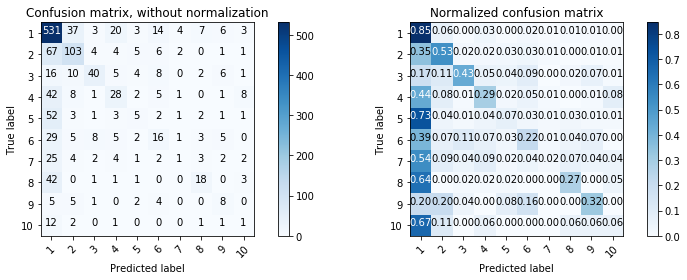

In [173]:
#Confusion matrix ...

# Compute confusion matrix
y_pred = ovr.predict(features_test)
class_names = ['1', '2','3','4','5','6','7','8','9','10']
cnf_matrix = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                     title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.subplot(122)
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                     title='Normalized confusion matrix')


## 5. Discussion/Conclusions

*Interpret and explain your results *

*- Discuss the relevance of the performance measures (accuracy and LogLoss) for
imbalanced multiclass datasets. *

*- How the results relate to the literature. *

*- Suggestions for future research/improvement. *

*- Did the study answer your questions? *



## 6. References

*List of all the references cited in the document*

## Appendix
*Any additional material needed to complete the report can be included here. For example, if you want to keep  additional source code, additional images or plots, mathematical derivations, etc. The content should be relevant to the report and should help explain or visualize something mentioned earlier. **You can remove the whole Appendix section if there is no need for it.** *

In [ ]:

#features = preprocessing.normalize(features, 'l1')
# Not normalized because https://stats.stackexchange.com/questions/48360/is-standardization-needed-before-fitting-logistic-regression



# Display first 5 song feautures
# Display first 5 song labels 
# Scatter plots of the features

# rhythm, chroma and mfcc features scatter plot

# The dimensionality of the data is high as there are 264 features. Analysing the data visually is very hard when the dimensionality increases over 6. There are multiple ways for reducing the dimensions of dataset, so it can be further analyzed. WE have used PCA to reduce the number of features.
# The features are divided in three categories: 1) Timbre; 2) Rhytm and 3) Pitch. In theory the data could be reduced to these three components, but if the features are reduced under, see below.
# We noticed by trial and error that with six principle six Principle Components it ispossible to maintain accuracy of the data and 99% of the variance of the data.
# Scatter plot of reduced data set (6 features)



# Display histogram data of labels (different kind of songs)








